In [1]:
import pandas as pd

df = pd.read_csv('/run/media/anton/Seagate Portable Drive/PNC/phenotypes.txt', sep='\t', comment='#')
print(df)

/tmp/ipykernel_2185695/2654265512.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/run/media/anton/Seagate Portable Drive/PNC/phenotypes.txt', sep='\t', comment='#')


       dbGaP_Subject_ID        SUBJID  INT_NUM INT_TYPE        Race Sex  \
0                791086  600001103037        1       MP          AA   M   
1                791086  600001103037        2       MI          AA   M   
2                791087  600001676724        1       AP          AA   F   
3                791088  600003245643        1      YPI          AA   M   
4                791090  600004963801        1       MP          EA   F   
...                 ...           ...      ...      ...         ...  ..   
14636            800198  609993878116        2       MI          EA   M   
14637            800199  609998081561        1       MP  EA,HI + OT   M   
14638            800199  609998081561        2       MI  EA,HI + OT   M   
14639            800200  609999144528        1       MP          EA   F   
14640            800200  609999144528        2       MI          EA   F   

       Med_birth_year Med_Rating  ADD011  ADD012  ...  SUB_OTC  SUB_PSY  \
0              1999.0   

In [16]:
import pickle

basedir = '/home/anton/Documents/Tulane/Research/PNC_Good/'

rest = pickle.load(open(f'{basedir}/PNC_SPM_rest_good_filt.pkl', 'rb'))
nback = pickle.load(open(f'{basedir}/PNC_SPM_nback_good_filt.pkl', 'rb'))
emoid = pickle.load(open(f'{basedir}/PNC_SPM_emoid_good_filt.pkl', 'rb'))

print(len(list(rest.keys())))
print('Complete')

1387
Complete


In [17]:
# Compute Pearson matrices and save in ImageNomer dir

import numpy as np

prest = dict()
pnback = dict()
pemoid = dict()

for ts,ps in zip([rest, nback, emoid], [prest, pnback, pemoid]):
    for sub in ts.keys():
        p = np.corrcoef(ts[sub])
        ps[sub] = p
    print('Finished one')
    
print('Complete')

Finished one
Finished one
Finished one
Complete


In [68]:
from natsort import natsorted

kr = set(rest.keys())
kn = set(nback.keys())
ke = set(emoid.keys())

conj = kr.intersection(kn).intersection(ke)
disj = kr.union(kn).union(ke)
print(len(conj))
print(len(disj))

allsubs = natsorted(list(disj))
print(len(allsubs))
print(allsubs[0])

1345
1529
1529
600001103037


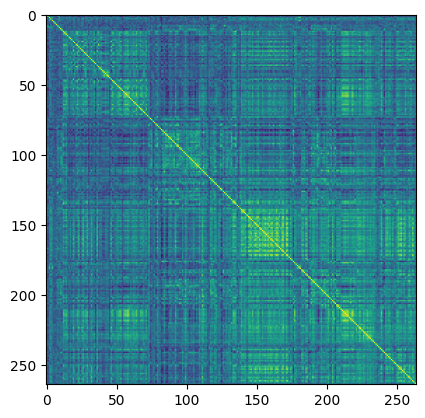

In [43]:
import matplotlib.pyplot as plt

plt.imshow(pemoid[allsubs[200]])
plt.show()

In [44]:
a,b = np.triu_indices(264,1)
pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC'

for ps,task in zip([prest, pnback, pemoid], ['rest', 'nback', 'emoid']):
    for sub in ps.keys():
        p = ps[sub][a,b]
        np.save(f'{pncdir}/fc/{sub}_task-{task}_fc.npy', p)
    print(f'Finished {task}')
    
print('Complete')

Finished rest
Finished nback
Finished emoid
Complete


In [52]:
phenosubs = df[df['age_at_cnb'].notna()]['SUBJID'].tolist()
phenosubs = [str(sub) for sub in phenosubs]

print(phenosubs[0])

600001103037


In [84]:
columns = '''
 'Race',
 'Sex',
 'Med_Rating',
 'GAF001',
 'GAF002',
 'GAF003',
 'age_at_cnb',
 'battery_valid',
 'PADT_GENUS',
 'PADT_VALID',
 'PADT_A',
 'PADT_T',
 'PADT_SAME_CR',
 'PADT_SAME_RTCR',
 'PADT_PC',
 'PADT_SAME_PC',
 'PFMT_GENUS',
 'PFMT_VALID',
 'PFMT_TP',
 'PFMT_TN',
 'PFMT_FP',
 'PFMT_FN',
 'PFMT_TPRT',
 'PFMT_TNRT',
 'PFMT_FPRT',
 'PFMT_FNRT',
 'PFMT_IFAC_TOT',
 'PFMT_IFAC_RTC',
 'PEIT_GENUS',
 'PEIT_VALID',
 'PEIT_CR',
 'PEIT_CRT',
 'PEITANG',
 'PEITFEAR',
 'PEITHAP',
 'PEITNOE',
 'PEITSAD',
 'PEITANGRT',
 'PEITFEARRT',
 'PEITHAPRT',
 'PEITNOERT',
 'PEITSADRT',
 'PWMT_GENUS',
 'PWMT_VALID',
 'PWMT_TP',
 'PWMT_TN',
 'PWMT_FP',
 'PWMT_FN',
 'PWMT_TPRT',
 'PWMT_TNRT',
 'PWMT_FPRT',
 'PWMT_FNRT',
 'PWMT_KIWRD_TOT',
 'PWMT_KIWRD_RTC',
 'PVRT_GENUS',
 'PVRT_VALID',
 'PVRT_CR',
 'PVRT_RTCR',
 'PVRT_RTER',
 'PEDT_GENUS',
 'PEDT_VALID',
 'PEDT_HAP_CR',
 'PEDT_SAD_CR',
 'PEDT_ANG_CR',
 'PEDT_FEAR_CR',
 'PEDT_HAP_RTCR',
 'PEDT_SAD_RTCR',
 'PEDT_ANG_RTCR',
 'PEDT_FEAR_RTCR',
 'PEDT_SAME_CR',
 'PEDT_SAME_RTCR',
 'PEDT_A',
 'PEDT_T',
 'PEDT_PC',
 'PEDT_HAP_PC',
 'PEDT_SAD_PC',
 'PEDT_ANG_PC',
 'PEDT_FEAR_PC',
 'PEDT_SAME_PC',
 'MP_GENUS',
 'MP_VALID',
 'MP_MP2RTCR',
 'PMAT_GENUS',
 'PMAT_VALID',
 'PMAT_CR',
 'PMAT_RTCR',
 'PMAT_RTER',
 'PMAT_PC',
 'TAP_GENUS',
 'TAP_VALID',
 'TAP_HAND',
 'TAP_DOM',
 'TAP_NON',
 'TAP_DOMSD',
 'TAP_NONSD',
 'TAP_TOT',
 'VOLT_GENUS',
 'VOLT_VALID',
 'VOLT_SVT',
 'VOLT_SVTCRT',
 'VOLT_SVTIRT',
 'VOLT_SVTTP',
 'VOLT_SVTTN',
 'VOLT_SVTFP',
 'VOLT_SVTFN',
 'VOLT_SVTTPRT',
 'VOLT_SVTTNRT',
 'VOLT_SVTFPRT',
 'VOLT_SVTFNRT',
 'LNB_GENUS',
 'LNB_VALID',
 'LNB_TP',
 'LNB_FP',
 'LNB_RTC',
 'LNB_MCR',
 'LNB_MRTC',
 'LNB_TP0',
 'LNB_FP0',
 'LNB_RTC0',
 'LNB_TP1',
 'LNB_FP1',
 'LNB_RTC1',
 'LNB_TP2',
 'LNB_FP2',
 'LNB_RTC2',
 'PCET_GENUS',
 'PCET_VALID',
 'PCET_RTCR',
 'PCET_RTER',
 'PCET_CAT',
 'PCET_ACC2',
 'PCPT_GENUS',
 'PCPT_VALID',
 'PCPT_N_TP',
 'PCPT_N_FP',
 'PCPT_N_TPRT',
 'PCPT_N_FPRT',
 'PCPT_L_TP',
 'PCPT_L_FP',
 'PCPT_L_TPRT',
 'PCPT_L_FPRT',
 'PCPT_T_FP',
 'PCPT_T_TP',
 'PCPT_T_TPRT',
 'PCPT_T_FPRT',
 'PLOT_GENUS',
 'PLOT_VALID',
 'PLOT_TC',
 'PLOT_TCRT',
 'PLOT_OFF',
 'PLOT_PC',
 'WRAT_GENUS',
 'WRAT_VALID',
 'WRAT_CR_RAW',
 'WRAT_CR_STD',
 'SUB_ALC',
 'SUB_COC',
 'SUB_DOWN',
 'SUB_INH',
 'SUB_MAR',
 'SUB_OPI',
 'SUB_OTC',
 'SUB_PSY',
 'SUB_STER',
 'SUB_STIM',
 'SUB_TOB',
 'SUB_TRAN',
 'SUB_TOT',
 'Education',
 'Mother_Education',
 'Father_Education'
'''

import re

columns = re.split('[\n,\' ]+', columns)
columns = [c for c in columns if c]

print(columns)

['Race', 'Sex', 'Med_Rating', 'GAF001', 'GAF002', 'GAF003', 'age_at_cnb', 'battery_valid', 'PADT_GENUS', 'PADT_VALID', 'PADT_A', 'PADT_T', 'PADT_SAME_CR', 'PADT_SAME_RTCR', 'PADT_PC', 'PADT_SAME_PC', 'PFMT_GENUS', 'PFMT_VALID', 'PFMT_TP', 'PFMT_TN', 'PFMT_FP', 'PFMT_FN', 'PFMT_TPRT', 'PFMT_TNRT', 'PFMT_FPRT', 'PFMT_FNRT', 'PFMT_IFAC_TOT', 'PFMT_IFAC_RTC', 'PEIT_GENUS', 'PEIT_VALID', 'PEIT_CR', 'PEIT_CRT', 'PEITANG', 'PEITFEAR', 'PEITHAP', 'PEITNOE', 'PEITSAD', 'PEITANGRT', 'PEITFEARRT', 'PEITHAPRT', 'PEITNOERT', 'PEITSADRT', 'PWMT_GENUS', 'PWMT_VALID', 'PWMT_TP', 'PWMT_TN', 'PWMT_FP', 'PWMT_FN', 'PWMT_TPRT', 'PWMT_TNRT', 'PWMT_FPRT', 'PWMT_FNRT', 'PWMT_KIWRD_TOT', 'PWMT_KIWRD_RTC', 'PVRT_GENUS', 'PVRT_VALID', 'PVRT_CR', 'PVRT_RTCR', 'PVRT_RTER', 'PEDT_GENUS', 'PEDT_VALID', 'PEDT_HAP_CR', 'PEDT_SAD_CR', 'PEDT_ANG_CR', 'PEDT_FEAR_CR', 'PEDT_HAP_RTCR', 'PEDT_SAD_RTCR', 'PEDT_ANG_RTCR', 'PEDT_FEAR_RTCR', 'PEDT_SAME_CR', 'PEDT_SAME_RTCR', 'PEDT_A', 'PEDT_T', 'PEDT_PC', 'PEDT_HAP_PC', 'PEDT_

In [85]:
demo = dict()
for c in columns:
    demo[c] = dict()

for key in demo.keys():
    for sub in allsubs:
        vals = df[df['SUBJID'] == int(sub)][key].dropna().tolist()
        if len(vals) == 0:
            continue
        demo[key][sub] = vals[0]
    print(key, len(demo[key]))
    
pickle.dump(demo, open(f'{pncdir}/demographics.pkl', 'wb'))
        
print('Complete')

Race 1521
Sex 1529
Med_Rating 1464
GAF001 1528
GAF002 1527
GAF003 1527
age_at_cnb 1529
battery_valid 1529
PADT_GENUS 1529
PADT_VALID 1529
PADT_A 1513
PADT_T 1513
PADT_SAME_CR 1513
PADT_SAME_RTCR 1502
PADT_PC 1513
PADT_SAME_PC 1513
PFMT_GENUS 1529
PFMT_VALID 1529
PFMT_TP 1525
PFMT_TN 1525
PFMT_FP 1525
PFMT_FN 1525
PFMT_TPRT 1524
PFMT_TNRT 1522
PFMT_FPRT 1455
PFMT_FNRT 1406
PFMT_IFAC_TOT 1525
PFMT_IFAC_RTC 1525
PEIT_GENUS 1529
PEIT_VALID 1529
PEIT_CR 1528
PEIT_CRT 1528
PEITANG 1528
PEITFEAR 1528
PEITHAP 1528
PEITNOE 1528
PEITSAD 1528
PEITANGRT 1525
PEITFEARRT 1522
PEITHAPRT 1528
PEITNOERT 1519
PEITSADRT 1527
PWMT_GENUS 1529
PWMT_VALID 1529
PWMT_TP 1525
PWMT_TN 1525
PWMT_FP 1525
PWMT_FN 1525
PWMT_TPRT 1525
PWMT_TNRT 1521
PWMT_FPRT 680
PWMT_FNRT 1030
PWMT_KIWRD_TOT 1525
PWMT_KIWRD_RTC 1525
PVRT_GENUS 1529
PVRT_VALID 1529
PVRT_CR 1522
PVRT_RTCR 1521
PVRT_RTER 1403
PEDT_GENUS 1529
PEDT_VALID 1529
PEDT_HAP_CR 1521
PEDT_SAD_CR 1521
PEDT_ANG_CR 1521
PEDT_FEAR_CR 1521
PEDT_HAP_RTCR 1521
PEDT_SAD

In [3]:
df.columns.tolist()

['dbGaP_Subject_ID',
 'SUBJID',
 'INT_NUM',
 'INT_TYPE',
 'Race',
 'Sex',
 'Med_birth_year',
 'Med_Rating',
 'ADD011',
 'ADD012',
 'ADD013',
 'ADD014',
 'ADD015',
 'ADD016',
 'ADD017',
 'ADD018',
 'ADD019',
 'ADD020',
 'ADD021',
 'ADD022',
 'ADD023',
 'ADD024',
 'ADD025',
 'ADD026',
 'ADD027',
 'ADD028',
 'ADD029',
 'ADD030',
 'ADD032',
 'ADD033',
 'ADD034',
 'ADD034A',
 'ADD035',
 'ADD036',
 'ADD050',
 'AGR001',
 'AGR002',
 'AGR003',
 'AGR004',
 'AGR005',
 'AGR006',
 'AGR007',
 'AGR008',
 'AGR009',
 'AGR010',
 'AGR011',
 'AGR012',
 'AGR013',
 'AGR014',
 'AGR015',
 'AGR016',
 'AGR017',
 'AGR018',
 'AGR019',
 'AGR020',
 'AGR021',
 'AGR022',
 'AGR022A',
 'AGR023',
 'AGR024',
 'AGR030',
 'AGR035',
 'CDD001',
 'CDD001A',
 'CDD002',
 'CDD002A',
 'CDD003',
 'CDD004',
 'CDD005',
 'CDD006',
 'CDD007',
 'CDD008',
 'CDD009',
 'CDD010',
 'CDD011',
 'CDD013',
 'CDD014',
 'CDD015',
 'CDD016',
 'CDD017',
 'CDD019',
 'CDD020',
 'CDD021',
 'CDD022',
 'CDD023',
 'CDD024',
 'CDD025',
 'CDD026',
 'CDD026

In [80]:
df[df['SUB_ALC'].notna() & df['SUB_ALC'] != 0]

,dbGaP_Subject_ID,SUBJID,INT_NUM,INT_TYPE,Race,Sex,Med_birth_year,Med_Rating,ADD011,ADD012,...,SUB_OTC,SUB_PSY,SUB_STER,SUB_STIM,SUB_TOB,SUB_TRAN,SUB_TOT,Education,Mother_Education,Father_Education
13,1324580,600010736734,1,AP,AA,F,1995.0,NaN,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,NaN,12.0,18.0,12.0
22,1324581,600014536959,1,MP,AA,M,1998.0,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,8.0,16.0,18.0
26,791102,600015643764,1,AP,AA,F,1992.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,12.0,15.0,16.0
33,791107,600020364885,1,MP,EA,M,1994.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,NaN,11.0,18.0,16.0
40,791112,600023312864,1,AP,AA,F,1993.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,NaN,13.0,16.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14540,800142,609928216627,1,MP,AA,M,1995.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,NaN,9.0,17.0,12.0
14611,1324965,609982008194,1,MP,AA,F,1995.0,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,11.0,11.0,NaN
14614,800185,609982518012,1,MP,EA,M,1995.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,9.0,16.0,16.0
14628,800192,609988112522,1,MP,AA,F,1994.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,NaN,11.0,12.0,12.0


In [14]:
df[(df['GAF002'] < 40) & (df['GAF002'] != 0)]['GAF002']

72       38.0
101      33.0
168      20.0
236      33.0
247      31.0
         ... 
14256    38.0
14380    38.0
14590    33.0
14594    25.0
14605    31.0
Name: GAF002, Length: 199, dtype: float64